In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

## Getting the data set

In [4]:
columns_name = ['user_id','item_id', 'rating', 'timestamp']

df = pd.read_csv('./moviedata100k/u.data', sep = '\t', names = columns_name)
df.head(5)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique()  # unique users

943

In [7]:
df['item_id'].nunique()  #unique movies

1682

In [8]:
movies_title = pd.read_csv('./moviedata100k/u.item', sep = '\|', header= None)

In [9]:
movies_title.shape

(1682, 24)

In [10]:
movies_title = movies_title[[0,1]]

In [11]:
movies_title.columns = ['item_id', 'title']
movies_title.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df = pd.merge(movies_title, df, on = 'item_id')
df

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1,889289570
99996,1679,B. Monkey (1998),863,3,889289491
99997,1680,Sliding Doors (1998),863,2,889289570
99998,1681,You So Crazy (1994),896,3,887160722


In [13]:
df.tail()

,item_id,title,user_id,rating,timestamp
99995,1678,Mat' i syn (1997),863,1,889289570
99996,1679,B. Monkey (1998),863,3,889289491
99997,1680,Sliding Doors (1998),863,2,889289570
99998,1681,You So Crazy (1994),896,3,887160722
99999,1682,Scream of Stone (Schrei aus Stein) (1991),916,3,880845755


## Exploratory Data Analysis

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
themes = plt.style.available
print(themes)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [41]:
plt.style.use('ggplot')

In [42]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [18]:
# Creating a DataFrame of ratings. 
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [19]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [20]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [21]:
ratings.sort_values(by = 'rating', ascending = False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


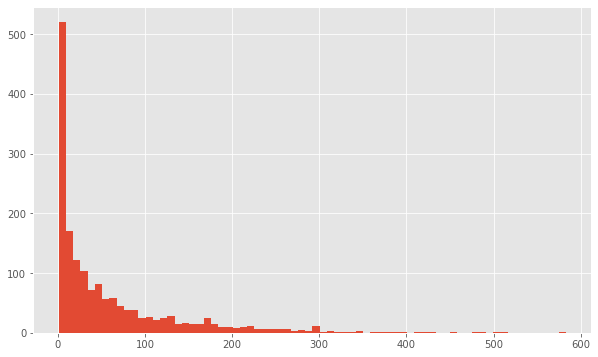

In [22]:
plt.figure(figsize = (10,6))
plt.hist(ratings['number of ratings'], bins = 70)
plt.show()

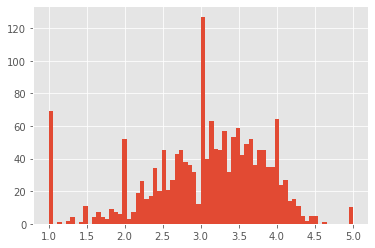

In [23]:
plt.hist(ratings['rating'],bins = 70)
plt.show()

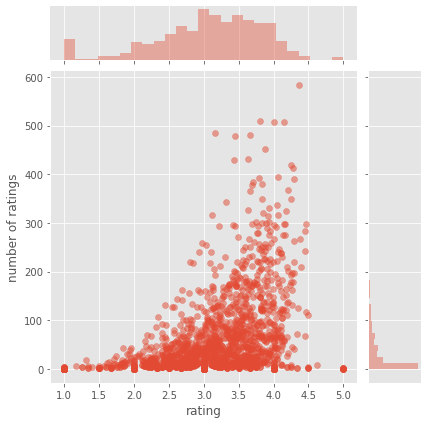

In [24]:
sns.jointplot(x='rating',y ='number of ratings', data = ratings,  alpha = 0.5)
plt.show()

## Creating Movie Recommendation 

In [25]:
df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [26]:
movieMat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movieMat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ratings.sort_values('number of ratings', ascending  = False).head()

,rating,number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [28]:
starwars_user_ratings = movieMat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [29]:
similar_to_starwars = movieMat.corrwith(starwars_user_ratings)

In [30]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])

In [31]:
corr_starwars.dropna(inplace = True ) #inplace drops it in the original DF as well.

In [32]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [33]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [34]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [35]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation', ascending = False)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


### Predict Function

In [36]:
def predict_movies(movie_name):
    movie_user_ratings = movieMat[movie_name]
    similar_to_movie = movieMat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
    corr_movie.dropna(inplace = True )
    
    corr_movie = corr_movie.join(ratings['number of ratings'])
    predictions = corr_movie[corr_movie['number of ratings']>100].sort_values('Correlation', ascending = False)
    
    return predictions

In [37]:
predictions = predict_movies("Titanic (1997)")

In [38]:
predictions.head()

,Correlation,number of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
